In [1]:
import napari

# Try to create a viewer
viewer = napari.Viewer()
viewer.close()  # Close the viewer after creation

C:\Users\Txomin Azpeitia\Miniconda\envs\newenv\Lib\site-packages\napari\utils\migrations.py:101: FutureWarning: Argument 'edge_color' is deprecated, please use 'border_color' instead. The argument 'edge_color' was deprecated in 0.5.0 and it will be removed in 0.6.0.
  return func(*args, **kwargs)


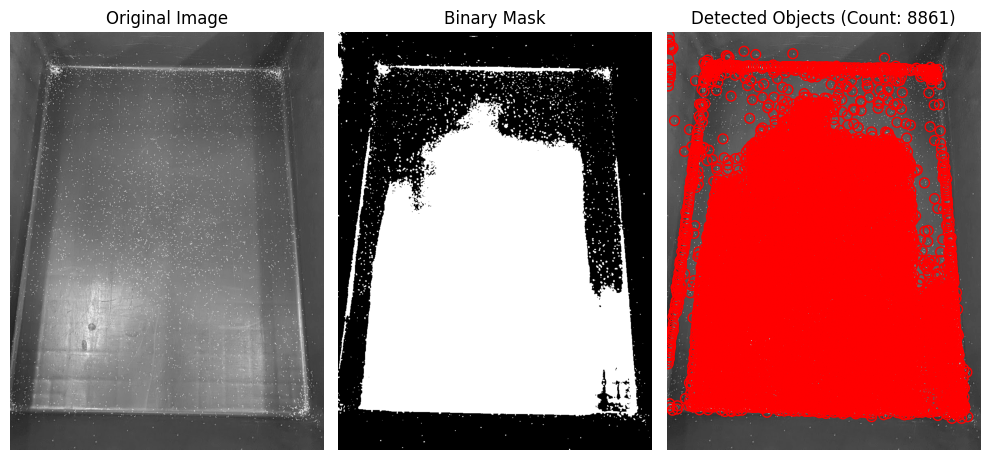

In [4]:
import skimage
import matplotlib.pyplot as plt
import numpy as np
import napari

# Import image
im = skimage.io.imread('IMG-20240807-WA0002.jpg')

# Convert to grayscale and create a smoothed version
im_gray = skimage.color.rgb2gray(im)
im_gauss = skimage.filters.gaussian(im_gray, sigma=1)

# Create a simple binary mask to avoid detecting eggs in the background
mask = (im_gauss > 0.4)

# Isolate one egg as template
template = im_gray[333:341, 456:464]

# Compare image and template
result = skimage.feature.match_template(im_gray, template, pad_input=True)

# Mask the output result
result_masked = result * mask

# Get local maxima (coordinates of detected objects)
coords = skimage.feature.peak_local_max(result_masked, threshold_abs=0.1, min_distance=2)

# Count of detected objects
num_objects = coords.shape[0]

# Visualize with napari
viewer = napari.Viewer()
viewer.add_image(im_gray, name='Original Image')
viewer.add_image(mask.astype(float), name='Mask', colormap='gray')
viewer.add_points(coords, face_color=[0,0,0,0], edge_color='red', size=5)
napari.run()

# Visualization with matplotlib
# Display original image
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(im_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display binary mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Binary Mask')
plt.axis('off')

# Display detected objects on original image
plt.subplot(1, 3, 3)
plt.imshow(im_gray, cmap='gray')
plt.scatter(coords[:, 1], coords[:, 0], facecolors='none', edgecolors='red', s=50)
plt.title(f'Detected Objects (Count: {num_objects})')
plt.axis('off')

plt.tight_layout()
plt.show()
